# Presentation
The objective on This Notebook is to code a very simple <a href="https://fr.wikipedia.org/wiki/Perceptron">perceptron</a>. This is consider as the simplest Neural Network as it's the original piece of it. It allows a linear classification. The principle is simple. By considering n-input and a bias, the perceptron should compute the weighted sum and pass this result in an activation function. Depending on this we have an output. Now the objective is to correct the weigths with a training set. You can see a representation of a perceptron below:

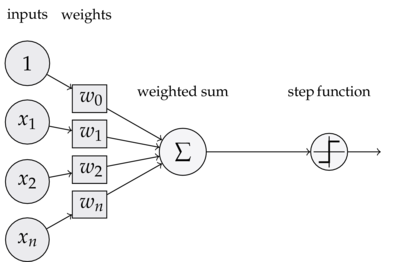

# Models

for this we gonna generate n points random and check if they are above or below a linear equation. Let's say
$$\begin{eqnarray}
y &=& 2x-0.3 \\
\end{eqnarray}$$

So for the input we gonna have a bias input (which is always 1) and 2 other input based on the point (X, Y)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def f(x):
    return 2*x-0.3

Now we can create the class Perceptron with a guess and fit methods. Guess will be used to compute the sum and pass it thru activation function. Fit will use guess and correct all weight based on the error.

The correction will be based on Frank Rosenblatt model :
$$\begin{equation}
W' = W + \alpha*(y_{estimated} - y_{expected})*X \\
\text{where :} \\
\text{W' = new weight matrix} \\
\text{α = Learning Factor (0 < R < 1)} \\
\text{X = the matrice of input} \\
\end{equation}$$

In [3]:
class Perceptron:
    def __init__(self, size):
        self.learning_rate = 0.025
        self.size = size
        self.weight = np.random.rand(3)

    def __repr__(self):
        return "{}".format(self.weight)

    def fit(self, samples, target):
        for i in range(len(samples)):
            guess = np.sign(np.sum(self.weight * samples[i])) # activation function
            self.weight += self.learning_rate * (target[i] - guess) * samples[i] # correction

    def guess(self, list_point, target):
        accuracy = 0
        for i in range(len(list_point)):
            guess = np.sign(np.sum(self.weight * list_point[i]))
            if guess == target[i]:
                accuracy += 1
        return accuracy / len(list_point)

    def evaluate(self, X):
        return -(self.weight[1]*X + self.weight[0])/self.weight[2]
    
brain = Perceptron(3)
print(brain)

[ 0.98567913  0.90606242  0.07559575]


In [4]:
# creation of the training set
n = 5000
bias = np.ones(n) # bias is always 1 (linked to w0 on the picture)
X = np.random.rand(n)
Y = np.random.rand(n)
C = np.sign(Y-f(X)) # output 1 if sign is positive else -1. If distance is 0, it output 0

print(C)

[-1. -1. -1. ...,  1.  1. -1.]


Now we can train it

In [5]:
brain.fit(np.c_[bias, X, Y], C)
print(brain)

[ 0.08567913 -0.56505676  0.27657952]


We can see that weight changed, we can now test it

In [6]:
# creation of the test set (won't be used in training)
n = 500
bias_test = np.ones(n)
X_test = np.random.rand(n)
Y_test = np.random.rand(n)
C_test = np.sign(Y_test-f(X_test)) # just required to estimate accuracy

In [7]:
accuracy = brain.guess(np.c_[bias_test, X_test, Y_test], C_test)
print("accuracy {:.2f} %".format(accuracy*100))

accuracy 99.80 %


99.8% ! Not so bad (only 1 error on the 500 samples).
We can also visualize the model by plotting all points with colors depending on the class, the exact equation we used for the model and the expected equation.
The expected equation is based on the perception weight because we have :

$$\begin{equation}
S = W_0 * bias + W_1 * X + W_2 * Y \\
\text{where : W_i is the i-th weight} \\
\end{equation}$$

So we can get the equation as follow :

$$\begin{equation}
Y = \frac{-bias - W_1 * X} {W_2} \\
\end{equation}$$

This is done on evaluate method on the perceptron

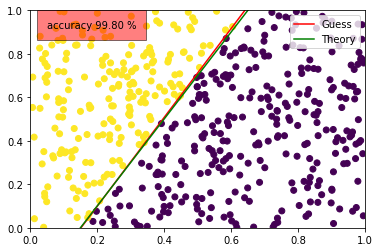

In [8]:
plt.plot([0, 1], [brain.evaluate(0), brain.evaluate(1)], color="red", label="Guess")
plt.plot([0, 1], [f(0), f(1)], color="green", label="Theory")
plt.scatter(X_test, Y_test, c=C_test )
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc="upper right")
plt.text(0.05, 0.92, "accuracy {:.2f} %".format(accuracy*100), bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()

# Conclusion

This model is easy to set-up, easy to understand but there is one drawback. As output is either 1 ou -1, the error is always -2 or 2 (except for exact value where output is 0 but it's very rare...). That means we nearly always correct always the same quantity on every weight (linear only with the input. That means that the prediction can be good or bad only based on the few last inputs on the training model). If input are importants and the guess is wrong, the weight (so the equation) will change a lot. A solution to this is to readuce learning rate with the size of the training set.